<a href="https://colab.research.google.com/github/LcgDL/Adversarial-machine-learning/blob/main/Adversarial_Attack_FGSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Attack

Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
#keras gives an application programming interface (API)
import seaborn as sn    

Import dataset

In [ ]:
(xTrain, yTrain) , (xTest, yTest) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


The dataset mnist contains 70,000 images of handwritten digits, of which 60,000 are used for training and 10,000 for testing the model:

In [ ]:
xTrain.shape

(60000, 28, 28)

In [ ]:
len(xTest)

10000

The images are represented with 28 × 28 pixels in grayscale and contain all digits between 0 and 9. The pixel values range from 0 to 255.


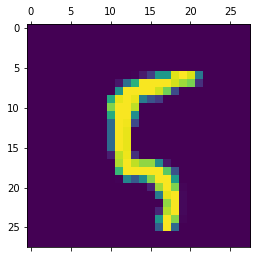

In [ ]:
plt.matshow(xTrain[100])

Internally, the training image is represented as a two-dimensional array:

In [ ]:
np.set_printoptions(formatter={'all': lambda x: "{:.0f}".format(x)})
w=xTrain[100]
for i in range(28):
   if i == 7:
        continue
   print(w[i, :])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 2 18 46 136 136 244 255 241 103 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 131 253 253 253 253 237 200 57 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 155 246 253 247 108 65 45 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 207 253 253 230 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 157 253 253 125 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 89 253 250 57 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 89 253 247 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 89 253 247 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 89 253 247 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 21 231 249 34 0 0 0 0 0 0 0 0 0

It is scaled, i.e. its contents are mapped to the number space [0,1].

In [ ]:
xTrain = tf.keras.utils.normalize(xTrain, axis=1)
xTest = tf.keras.utils.normalize(xTest, axis=1)

In [ ]:
np.set_printoptions(formatter={'all': lambda x: "{:.0f}".format(x)})
w=xTrain[100]
for i in range(28):
   if i == 7:
        continue
   print(w[i, :])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0

Reshape the data

In [ ]:
xTrain = xTrain.reshape((-1, 28, 28, 1))
xTest = xTest.reshape((-1, 28, 28, 1))
print("Shapes: ", xTrain.shape, xTest.shape)
yTrain = tf.keras.utils.to_categorical(yTrain, 10)
yTest = tf.keras.utils.to_categorical(yTest, 10)
print("Shapes:", yTrain.shape, yTest.shape)

Shapes:  (60000, 28, 28, 1) (10000, 28, 28, 1)
Shapes: (60000, 10) (10000, 10)


#Model

In [ ]:
from tensorflow.keras import datasets, layers, models
modelCNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [ ]:
modelCNN.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
CNNhistory = modelCNN.fit(xTrain, yTrain,batch_size=32,epochs=10,validation_data=(xTest, yTest))

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0122 - accuracy: 0.9202 - val_loss: 0.0055 - val_accuracy: 0.9659
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0052 - accuracy: 0.9676 - val_loss: 0.0041 - val_accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0039 - accuracy: 0.9757 - val_loss: 0.0033 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0032 - accuracy: 0.9794 - val_loss: 0.0032 - val_accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0028 - accuracy: 0.9819 - val_loss: 0.0029 - val_accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0025 - accuracy: 0.9840 - val_loss: 0.0032 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0023 - accuracy: 0.9855 - val_loss: 0.0027 -

Evaluating Test Dataset

In [ ]:
modelCNN.evaluate(xTest,yTest)

313/313 [==============================] - 2s 6ms/step - loss: 0.0025 - accuracy: 0.9837


[0.0025172289460897446, 0.9836999773979187]

Predicction

In [ ]:
testPredicted=modelCNN.predict(xTest)
np.argmax(testPredicted[100])

6

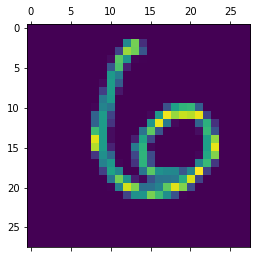

In [ ]:
plt.matshow(xTest[100].squeeze())

#Adversarial Example

In [ ]:
def adversarialFun(image, label):
    img = tf.cast(image, tf.float32)
    with tf.GradientTape() as tap:
        tap.watch(img)
        prediction = modelCNN(img)
        loss = tf.keras.losses.MSE(label, prediction)
    gradient = tap.gradient(loss, img)
    signedGrad = tf.sign(gradient)
    return signedGrad

Normal image with its label

In [ ]:
img = xTrain[100]
imgLab = yTrain[100]

Generation of perturbation

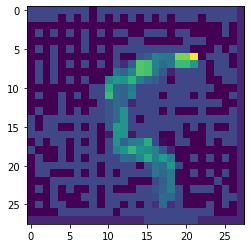

In [ ]:
perturbation = adversarialFun(img.reshape((1, 28, 28, 1)), imgLab).numpy()
adverImg = img + perturbation * 0.1
if 1 == 1:
    plt.imshow(adverImg.reshape((28, 28)))
else:
    plt.imshow(adverImg.reshape((28, 28, 2)))
plt.show()

In [ ]:
labs = ['zero=0', 'one=1', 'two=2', 'three=3', 'four=4', 'five=5', 'six=6', 'seven=7', 'eight=8', 'nine=9']
print("Correct prediction: ",labs[modelCNN.predict(img.reshape((1, 28, 28, 1))).argmax()])
print("Adversarial prediction: ",labs[modelCNN.predict(adversarial).argmax()])

Correct prediction:  five=5
Adversarial prediction:  one=1


#Defense

Adversarial Generator

In [ ]:
import random
def generator(batchSize):
    while True:
        x,y = [],[]
        for b in range(batchSize):
            r = random.randint(0, 100)
            lab = yTrain[r]
            img = xTrain[r]
            perturbation = adversarialFun(img.reshape((1, 28, 28, 1)), lab).numpy()
            adverImg = img + perturbation * 0.1
            x.append(adverImg)
            y.append(yTrain[r])
        x = np.asarray(x).reshape((batchSize, 28, 28, 1))
        y = np.asarray(y)
        
        yield x, y
xAdvTest, yAdvTest = next(generator(10000))

In [ ]:
print("Adversarial Accuracy:", modelCNN.evaluate(x=xAdvTest, y=yAdvTest, verbose=0))

Adversarial Accuracy: [0.18108929693698883, 0.05849999934434891]


The model becomes more robust

In [ ]:
xTrainAdv, yTrainAdv = next(generator(20000))

In [ ]:
modelCNN.fit(xTrainAdv, yTrainAdv,batch_size=32,epochs=10,validation_data=(xTest, yTest))

Epoch 1/10
625/625 [==============================] - 12s 20ms/step - loss: 0.0513 - accuracy: 0.6783 - val_loss: 0.0120 - val_accuracy: 0.9194
Epoch 2/10
625/625 [==============================] - 12s 20ms/step - loss: 1.2291e-05 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9173
Epoch 3/10
625/625 [==============================] - 12s 20ms/step - loss: 3.7293e-06 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9173
Epoch 4/10
625/625 [==============================] - 12s 20ms/step - loss: 2.0244e-06 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 0.9170
Epoch 5/10
625/625 [==============================] - 12s 20ms/step - loss: 1.2430e-06 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9163
Epoch 6/10
625/625 [==============================] - 12s 20ms/step - loss: 7.6209e-07 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9158
Epoch 7/10
625/625 [==============================] - 12s 20ms/step - loss: 5.9529e-07 - accuracy: 1.0000 - val_loss

In [ ]:
print("Accuracy on testing dataset: ")
modelCNN.evaluate(xTest,yTest)

Accuracy on testing dataset: 
313/313 [==============================] - 2s 6ms/step - loss: 0.0132 - accuracy: 0.9148


[0.013162393122911453, 0.9147999882698059]

In [ ]:
print("Accuracy on adversarial testing dataset: ")
modelCNN.evaluate(xAdvTest,yAdvTest)

Accuracy on adversarial testing dataset: 
313/313 [==============================] - 2s 6ms/step - loss: 3.7207e-08 - accuracy: 1.0000


[3.720672481222209e-08, 1.0]

Improving the model in the detection of Adversarial Examples:

In [ ]:
labs = ['zero=0', 'one=1', 'two=2', 'three=3', 'four=4', 'five=5', 'six=6', 'seven=7', 'eight=8', 'nine=9']
print("Correct prediction: ",labs[modelCNN.predict(img.reshape((1, 28, 28, 1))).argmax()])
print("Adversarial prediction: ",labs[modelCNN.predict(adversarial).argmax()])

Correct prediction:  five=5
Adversarial prediction:  five=5


Literature

-"Adversarial Attacks and Defences: A Survey" Anirban Chakraborty, Manaar Alam, Vishal Dey, Anupam Chattopadhyay, Debdeep Mukhopadhyay

-"Explaining and Harnessing Adversarial Examples" Ian J. Goodfellow, Jonathon Shlens, Christian Szegedy